In [36]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

In [2]:
#Getting the dataset
!gdown --id '1ym6ihnbxeB4hGTBIW3UCBzTX29fkB2Sa'

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1ym6ihnbxeB4hGTBIW3UCBzTX29fkB2Sa
To: /content/Data for EDA.csv
100% 202k/202k [00:00<00:00, 120MB/s]


In [4]:
df = pd.read_csv('/content/Data for EDA.csv')
df.head()

,Unnamed: 0,Phone Name,Rating ?/5,Number of Ratings,Back/Rare Camera,Front Camera,Processor,Price in INR,Date of Scraping,Company Name,Ram_size,Storage_size,Battery_size
0,0,"POCO C50 (Royal Blue, 32 GB)",4.2,33561,8MP Dual Camera,5MP Front Camera,"Mediatek Helio A22 Processor, Upto 2.0 GHz Pro...",5649,2023-06-17,POCO,2.0,32.0,5000
1,1,"POCO M4 5G (Cool Blue, 64 GB)",4.2,77128,50MP + 2MP,8MP Front Camera,Mediatek Dimensity 700 Processor,11999,2023-06-17,POCO,4.0,64.0,5000
2,2,"POCO C51 (Royal Blue, 64 GB)",4.3,15175,8MP Dual Rear Camera,5MP Front Camera,Helio G36 Processor,6999,2023-06-17,POCO,4.0,64.0,5000
3,3,"POCO C55 (Cool Blue, 64 GB)",4.2,22621,50MP Dual Rear Camera,5MP Front Camera,Mediatek Helio G85 Processor,7749,2023-06-17,POCO,4.0,64.0,5000
4,4,"POCO C51 (Power Black, 64 GB)",4.3,15175,8MP Dual Rear Camera,5MP Front Camera,Helio G36 Processor,6999,2023-06-17,POCO,4.0,64.0,5000


In [5]:
df.drop(['Unnamed: 0'], axis=1,inplace=True)
df.columns

Index(['Phone Name', 'Rating ?/5', 'Number of Ratings', 'Back/Rare Camera',
       'Front Camera', 'Processor', 'Price in INR', 'Date of Scraping',
       'Company Name', 'Ram_size', 'Storage_size', 'Battery_size'],
      dtype='object')

<Axes: >

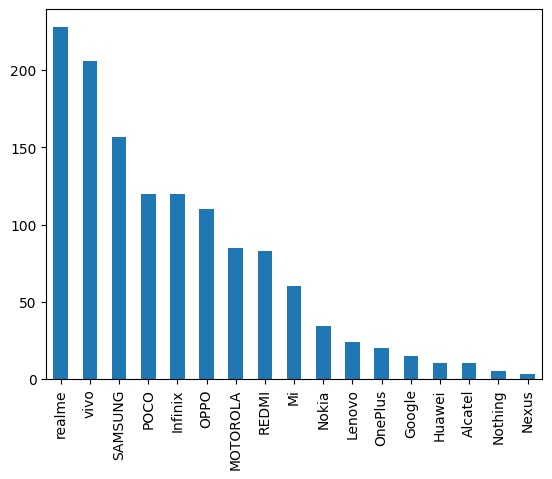

In [16]:
#Let's look at the most released phone company

df['Company Name'].value_counts().plot(kind='bar')

### As we can see that Realme is on top with more than 200 ads and vivo is on second position the least phone released company is Nexus with less than 10 phones.

### Samsung is on 3rd number with more than 150 phones added.

In [38]:
fig=px.bar(df.groupby('Company Name',as_index=False)['Price in INR'].mean().sort_values(by='Price in INR',ascending=False),
           x='Company Name',y='Price in INR',color='Company Name',labels={'Company Name':'Company Name','Price in INR':'Price'},
           template='ggplot2',text='Price in INR',title='<b> Company phone average prices')
fig.show()

### 1. Google phones has more average price than others with almost 60k INR.
### 2. Nothing phones are less expansive then Nexus which is more than 40k.
### 3. Alcatel phones are cheapest followed by Nokia

In [44]:
fig=px.bar(df.groupby('Phone Name',as_index=False)['Price in INR'].mean().sort_values(by='Price in INR',ascending=False).head(20),
           x='Phone Name',y='Price in INR',color='Phone Name',labels={'Phone Name':'Phone Name','Price in INR':'Price'},
           template='xgridoff',text='Price in INR',title='<b> Top 20 more expensive phones')
fig.show()

### 1. Samsung phone are more expansive like Galaxy s23 Ultra 5G
### 2. Mostly phones are Samsung phones but some are like OPPO, Vivo and Google are also included into this list.

In [50]:
fig=px.pie(df.groupby('Company Name',as_index=False)['Rating ?/5'].mean().sort_values(by='Rating ?/5',ascending=False),
           names='Company Name',values='Rating ?/5',color='Company Name',
           labels={'Company Name':'Company Name ','Rating ?/5':'Average Rating'},template='ggplot2',
           title='<b>Company by Rating')
fig.update_layout(title_x=0.5,legend=dict(orientation='h',yanchor='bottom',
                                          y=1.0,xanchor='right',x=1))

<Axes: title={'center': 'Price percentage with size of the Ram'}, ylabel='Price in INR'>

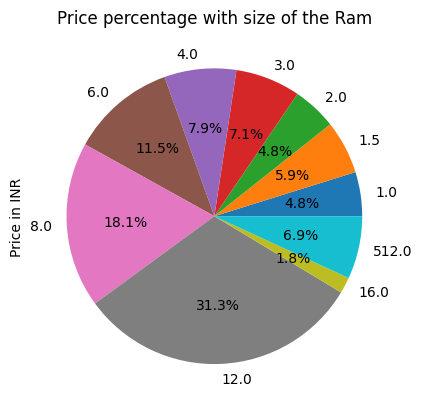

In [66]:
df.groupby(['Ram_size'])['Price in INR'].mean().plot(kind='pie',autopct='%1.1f%%',title="Price percentage with size of the Ram")

### 1. Here is the 12.0 GB Ram is more expansive
### 2. And 16 and 512 looks like the outliers in this dataset
### 3. And the cheapest is 1.0 GB Ram which as Ram size increases the Prices also goes up.

<Axes: xlabel='Storage_size'>

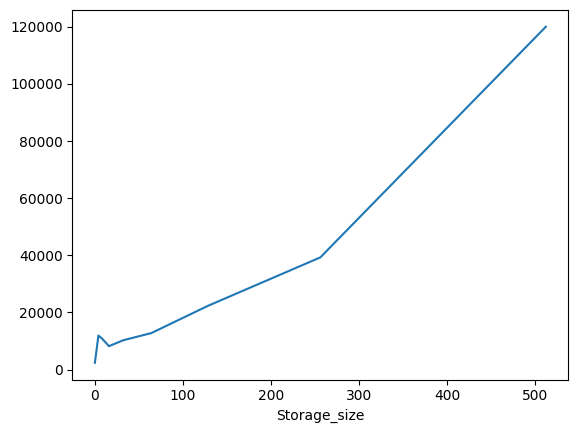

In [69]:
df.groupby(['Storage_size'])['Price in INR'].mean().plot(kind='line',title="Price by Storage Size")

### It is clearly showing the upward trend which means the Storage size increases the price increases